In [7]:
import re
import os
import random
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from urllib.parse import urlparse
from sklearn import preprocessing
import tldextract
%matplotlib inline
import random
import gc
import xgboost as xgb
from sklearn import svm
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn import metrics

In [2]:
df=pd.read_csv("/Users/abhinavshinow/Documents/GitHub/Mal_URL/Data/XSS_dataset.csv")

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [8]:
df.head()

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


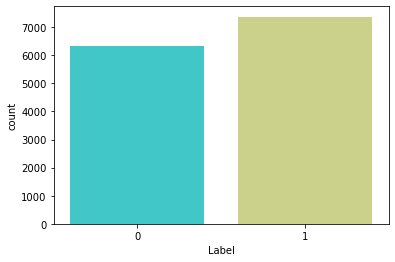

In [10]:
sns.countplot(x='Label',data=df, palette='rainbow')
plt.show()

In [6]:
MAX_WORDS = 100
MAX_LEN = 100
BATCH_SIZE=64
EPOCHS=100

In [9]:
x=df['Sentence']
y=df['Label']

#Tokenising the url's
tok = Tokenizer(num_words=MAX_WORDS)
tok.fit_on_texts(x)
x = tok.texts_to_sequences(x.values)
x = sequence.pad_sequences(x, maxlen=MAX_LEN)

#One-Hot Encoding the target labels
y = np.array(to_categorical(y))

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,shuffle=True)

In [12]:
x[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  6,  1,  4, 15,  5, 39, 47, 67,  5, 39,
       47,  2, 39, 47, 46, 67, 46,  1,  1,  4, 15, 11,  1,  6, 43],
      dtype=int32)

In [ ]:
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(x_train,y_train)